<a href="https://colab.research.google.com/github/chris051091/Seminario-3/blob/master/climatologia/src/Testeo_Presi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testes - Humedad

In [1]:
import pandas as pd
import numpy as np
import os
import re
from functools import reduce

from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Mounted at /content/drive


In [33]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/preprocess/dados/'

# NOMBRE_ESTACION = 'chucuri'
# RANGE_PRESION = [850, 900]
# NOMBRE_ESTACION = 'palanquero'
# RANGE_PRESION = [950, 1000]
NOMBRE_ESTACION = 'vizcaina'
RANGE_PRESION = [980, 1015]


PATH_FINAL_DADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/'
PATH_FINAL_DADOS_TRATADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/tratados/'

FILE_DATOS_PROCESADOS = NOMBRE_ESTACION.lower() + '_procesado.csv'
FILE_DATOS_TRATADOS = NOMBRE_ESTACION.lower() + '_tratados_pres.csv'


In [30]:
df = pd.read_csv(PATH_FINAL_DADOS + FILE_DATOS_PROCESADOS, 
                 sep = ';', 
                 parse_dates = ["FECHA"],
                 date_parser = lambda col: pd.to_datetime(col)
                )

dfVar = df[['FECHA', 'PRESION']].copy()
dfVar = dfVar.sort_values(by=['FECHA']).reset_index(drop = True)
dfVar

,FECHA,PRESION
0,2011-01-01 01:00:00-05:00,697.7
1,2011-01-01 02:00:00-05:00,697.1
2,2011-01-01 03:00:00-05:00,697.1
3,2011-01-01 04:00:00-05:00,697.6
4,2011-01-01 05:00:00-05:00,698.2
...,...,...
52238,2017-12-31 19:00:00-05:00,998.7
52239,2017-12-31 20:00:00-05:00,999.6
52240,2017-12-31 21:00:00-05:00,1000.3
52241,2017-12-31 22:00:00-05:00,1001.1


## Test de rango fijo

In [34]:
pres_max = float(RANGE_PRESION[1])
pres_min = float(RANGE_PRESION[0])
lamb_func = lambda r: np.nan if ((r > pres_max) | (r < pres_min)) else r

dfVar['PRESION_RANGO_FIJO'] = dfVar['PRESION'].apply(lamb_func)
dfVar

,FECHA,PRESION,PRESION_RANGO_FIJO
0,2011-01-01 01:00:00-05:00,697.7,NaN
1,2011-01-01 02:00:00-05:00,697.1,NaN
2,2011-01-01 03:00:00-05:00,697.1,NaN
3,2011-01-01 04:00:00-05:00,697.6,NaN
4,2011-01-01 05:00:00-05:00,698.2,NaN
...,...,...,...
52238,2017-12-31 19:00:00-05:00,998.7,998.7
52239,2017-12-31 20:00:00-05:00,999.6,999.6
52240,2017-12-31 21:00:00-05:00,1000.3,1000.3
52241,2017-12-31 22:00:00-05:00,1001.1,1001.1


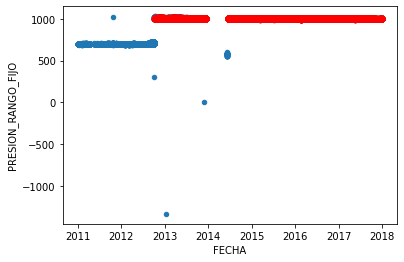

In [35]:
ax = dfVar.plot(kind = 'scatter', x='FECHA', y='PRESION')
dfVar.plot(kind = 'scatter', x='FECHA', y='PRESION_RANGO_FIJO', ax=ax, color='red')

In [36]:
## Para filtrar los valores finales
dfFinal = dfVar[~dfVar['PRESION_RANGO_FIJO'].isnull()]
dfFinal 

,FECHA,PRESION,PRESION_RANGO_FIJO
14004,2012-10-05 12:00:00-05:00,999.3,999.3
14005,2012-10-05 13:00:00-05:00,997.7,997.7
14006,2012-10-05 15:00:00-05:00,995.2,995.2
14007,2012-10-05 16:00:00-05:00,995.0,995.0
14008,2012-10-05 17:00:00-05:00,995.6,995.6
...,...,...,...
52238,2017-12-31 19:00:00-05:00,998.7,998.7
52239,2017-12-31 20:00:00-05:00,999.6,999.6
52240,2017-12-31 21:00:00-05:00,1000.3,1000.3
52241,2017-12-31 22:00:00-05:00,1001.1,1001.1


In [37]:
print(f'Datos iniciales : {dfVar.shape[0]}')
print(f'Datos nulos : {dfVar[dfVar["PRESION"].isnull()].shape[0]}')
print(f'Datos nulos después de los testes : {dfFinal[dfFinal["PRESION_RANGO_FIJO"].isnull()].shape[0]}')
print(f'Datos finales después de testes : {dfFinal.shape[0]}')
print(f'Datos no nulos que fueron eliminados en los testes : {dfVar.shape[0] - dfFinal.shape[0] - dfVar[dfVar["PRESION"].isnull()].shape[0]}')

Datos iniciales : 52243
Datos nulos : 1090
Datos nulos después de los testes : 0
Datos finales después de testes : 37412
Datos no nulos que fueron eliminados en los testes : 13741


In [38]:
dfFinal[['FECHA', 'PRESION']].to_csv(PATH_FINAL_DADOS_TRATADOS + FILE_DATOS_TRATADOS, header=True, index=False, sep = ';')